In [225]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import sklearn

In [226]:
df_2018 = pd.read_csv('2018_public_use_data.csv')
print(df_2018.shape)
# df_2018.dtypes

(6436, 1181)


In [227]:
df_filled = df_2018.replace(to_replace=replace_map, value=0).fillna(value=0)
df_filled = df_filled.replace(to_replace='.', value=0)
df_filled[0:20]

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,ZLTEXPC,ZPKLT,ZPKLTINOUT,ZPKLTN,ZWINTYP,ZTINT,ZREFL,ZAWN,ZSKYLT,ZDAYLTP
0,1,3,5,2,210000,8,1,4,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,4,9,2,28000,5,1,6,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,3,5,8,2100,2,1,4,0,3,...,0,0,0,0,0,0,0,0,0,0
3,4,3,7,5,240000,8,2,6,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,1,2,5,295000,8,3,6,0,1,...,0,0,0,0,0,0,0,0,0,0
5,6,3,5,14,94000,6,1,6,1,1,...,0,0,0,0,0,0,0,0,0,0
6,7,4,8,14,41000,5,1,4,1,1,...,0,0,0,0,0,0,0,0,0,0
7,8,2,3,5,122000,7,1,6,1,1,...,0,0,0,0,0,0,0,0,0,0
8,9,4,8,25,96000,6,3,6,1,1,...,1,0,0,0,1,1,1,1,1,1
9,10,1,2,14,220000,8,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [228]:
objects = list(df_filled.select_dtypes(['object']).columns)
objects

['BASEMNT',
 'ELEVTR',
 'NELVTR',
 'ESCLTR',
 'NESLTR',
 'RENOV',
 'RENCOS',
 'RENADD',
 'RENRDC',
 'RENINT',
 'RENRFF',
 'RENWIN',
 'RENHVC',
 'RENLGT',
 'RENPLB',
 'RENELC',
 'RENINS',
 'RENSAF',
 'RENSTR',
 'RENOTH',
 'DRYCL',
 'VACANT',
 'RWSEAT',
 'PBSEAT',
 'EDSEAT',
 'FDSEAT',
 'DRVTHRU',
 'HCBED',
 'NRSBED',
 'LODGRM',
 'COURT',
 'FEDFAC',
 'FACACT',
 'MANIND',
 'PLANT',
 'FACDST',
 'FACDHW',
 'FACDCW',
 'FACELC',
 'BLDPLT',
 'GOVTYP',
 'OWNOCC',
 'OWNPPR',
 'NWNPPR',
 'NWNOPR',
 'WHOPPR',
 'OCCUPYP',
 'LODOCCP',
 'FKTYPE',
 'SOPANEL',
 'SOTHERM',
 'HEATP',
 'HTLS50',
 'PKGHT',
 'FURNAC',
 'SLFCON',
 'BOILER',
 'HTPMPH',
 'STHW',
 'REHEAT',
 'FIREPLC',
 'OTHTEQ',
 'PKGHT_EL',
 'BOILER_EL',
 'HTPMPH_EL',
 'FURNAC_EL',
 'SLFCON_EL',
 'FIREPLC_EL',
 'REHEAT_EL',
 'OTHTEQ_EL',
 'PKGHT_NG',
 'BOILER_NG',
 'HTPMPH_NG',
 'FURNAC_NG',
 'SLFCON_NG',
 'FIREPLC_NG',
 'OTHTEQ_NG',
 'BOILER_FK',
 'FURNAC_FK',
 'SLFCON_FK',
 'OTHTEQ_FK',
 'PKGHT_PR',
 'BOILER_PR',
 'HTPMPH_PR',
 'FURNAC_PR',

In [229]:
for col in objects:
    df_filled[col] = df_filled[col].astype(str).astype(int)

In [230]:
list(df_filled.select_dtypes(['object']).columns)

[]

In [231]:
df_filled.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,ZLTEXPC,ZPKLT,ZPKLTINOUT,ZPKLTN,ZWINTYP,ZTINT,ZREFL,ZAWN,ZSKYLT,ZDAYLTP
2058,2059,2,4,2,120000,7,2,6,0,1,...,0,0,0,0,0,0,0,0,0,0
363,364,2,3,5,6300,3,1,5,1,2,...,0,0,9,9,0,0,0,0,0,0
503,504,1,1,16,136000,7,1,6,1,1,...,0,0,0,0,0,0,0,0,0,0
5751,5752,3,5,2,500001,9,3,1,0,1,...,0,0,9,9,0,0,0,0,0,0
1415,1416,1,2,8,110000,7,3,6,1,1,...,0,0,0,1,0,0,0,0,0,0


In [232]:
df_codebook = pd.read_csv('2018cbecs_codebook_wDicts.csv')
df_codebook.head()

,category,file_order,col_name,col_type,length,col_description,codes,codes_dict
0,0,1,PUBID,Char,5,Public use file building identifier,00001 - 06436,{'00001 - 06436': 'continuous numerical range'}
1,0,2,REGION,Char,1,Census Region,1=Northeast\n2=Midwest\n3=South\n4=West,"{'1': 'Northeast', '2': 'Midwest', '3': 'South..."
2,0,3,CENDIV,Char,1,Census division,1=New England\n2=Middle Atlantic \n3=East Nor...,"{'1': 'New England', '2': 'Middle Atlantic', '..."
3,0,4,PBA,Num,8,Principal building activity,1=Vacant\n2=Office\n4=Laboratory\n5=Nonrefrige...,"{'1': 'Vacant', '2': 'Office', '4': 'Laborator..."
4,1,5,SQFT,Num,8,Square footage,"1,001 - 2,100,000","{'1,001 - 2,100,000': 'continuous numerical ra..."


In [233]:
print(df_codebook.category.unique())

[0 1 2 3 4 5 6 7]


In [234]:
df_codebook_2012 = pd.read_csv('2012cbecs_codebook_wDicts.csv')
df_codebook_2012.head()

,category,file_order,col_name,col_type,length,format,col_description,codes,codes_dict
0,0,1.0,PUBID,Char,5.0,NaN,Building identifier,00001 - 06720,{'00001 - 06720': 'continuous numerical range'}
1,0,2.0,REGION,Char,1.0,$REGION.,Census region,'1' = 'Northeast'\r\n'2' = 'Midwest'\r\n'3' = ...,"{'1': 'Northeast', '2': 'Midwest', '3': 'South..."
2,0,3.0,CENDIV,Char,1.0,$CENDIV.,Census division,'1' = 'New England'\r\n'2' = 'Middle Atlantic'...,"{'1': 'New England', '2': 'Middle Atlantic', '..."
3,0,4.0,PBA,Char,2.0,$PBA.,Principal building activity,'01' = 'Vacant'\r\n'02' = 'Office'\r\n'04' = '...,"{'01': 'Vacant', '02': 'Office', '04': 'Labora..."
4,1,5.0,FREESTN,Char,1.0,$YES.,Freestanding building,1' = 'Yes'\r\nMissing='No',"{'1': 'Yes', 'Missing': 'No'}"


In [235]:
col_name_2012 = df_codebook_2012.col_name.values.tolist()
col_name_2018 = df_codebook.col_name.values.tolist()

In [236]:
keep_var = df_codebook[df_codebook['col_name'].isin(col_name_2012)]
keep_var.shape

## 330 overlapping variables 

(330, 8)

In [237]:
keep_var_list = keep_var.col_name.values.tolist()

In [238]:
## Read 2012 Data

df_2012 = pd.read_csv('2012cbecs_train-data.csv')
df_2012_cons = pd.read_csv('2012cbecs_consumption-data.csv')

In [239]:
df_2012.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,NFLOOR,BASEMNT,FLCEILHT,NELVTR,NESLTR,...,TRIM,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT
3910,3911,2,3,14,68000,4,1.0,10,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,2,1.0,0.0,0.0,0.0
4638,4639,2,4,15,4500,1,0.0,15,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,1.0,0.0
545,546,4,9,2,12500,2,0.0,10,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,2,0.0,0.0,1.0,1.0
3255,3256,2,4,25,25500,1,0.0,14,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,2,1.0,1.0,1.0,1.0
53,54,3,5,16,300000,9,0.0,9,5.0,0.0,...,0.0,0.0,0.0,2.0,1.0,2,1.0,0.0,1.0,0.0


In [240]:
df_2012 = df_2012[df_2012.columns.intersection(keep_var_list)]
df_2012.shape

(6720, 330)

In [241]:
df_2012_cons.sample(5)

,HDD65,CDD65,MFHTBTU,MFCLBTU,MFVNBTU,MFWTBTU,MFLTBTU,MFCKBTU,MFRFBTU,MFOFBTU,...,MFUSED,DHUSED,DHHT1,DHHT2,DHCOOL,DHCOOK,DHWATR,DHMANU,DHOTH,PUBCLIM
441,3545,1990,319892.0,668038.0,251840.0,69424.0,297999.0,16072.0,263729.0,39483.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1397,1347,1334,2036.0,46560.0,32798.0,40130.0,30230.0,0.0,0.0,3396.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3529,6440,1032,106805.0,2327.0,6465.0,124.0,3393.0,0.0,555.0,976.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4142,2491,1368,173902.0,136874.0,130837.0,299033.0,77572.0,0.0,0.0,27761.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2398,2867,2173,32240.0,160806.0,123310.0,207275.0,133425.0,0.0,10260.0,14162.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [242]:
category_map = {}
for cat in df_codebook.category.unique():
    category_cols_df = df_codebook[df_codebook['category'] == cat]
    cat_cols = []
    for col in category_cols_df.col_name.values:
        if type(col) == str:
            cat_cols.append(col)
    category_map[cat] = cat_cols

In [243]:
keep_cols = []
for wanted_cols in category_map.values():
    for col in wanted_cols:
        keep_cols.append(col)
print(len(keep_cols))

561


In [244]:
def find_num_cat_cols(list_of_dfs, category_num, list_of_numcols, list_of_catcols):
    numeric_cols = []
    categorical_cols = []
    for col in list_of_dfs[category_num].columns:
        if col in list_of_numcols:
            numeric_cols.append(col)
        elif col in list_of_catcols:
            categorical_cols.append(col)
    df_category = list_of_dfs[category_num].copy()[numeric_cols + categorical_cols]
    return df_category, numeric_cols, categorical_cols

In [245]:
def create_new_codebook(codebook, cols):
    new_codebook = dict(codebook.set_index('col_name').loc[cols].codes_dict)
    return new_codebook

In [246]:
def create_replace_map(new_codebook, category_df, return_errors=False):
    replace_map = {}
    error_map = {}
    for col_name, codebook in new_codebook.items():
        try:
            codebook = json.loads(codebook.replace("'", '"'))
        except ValueError as e:
            print(f'JSONDecodeError on column {col_name}')
            error_map[col_name] = (col_name, e)
            codebook = codebook.replace('"', '')
            codebook = json.loads(codebook.replace("'", '"'))
        finally:
            if col_name in category_df.columns:
                for code, code_val in codebook.items():
                    if code == '2' and code_val == 'No':
                        replace_map[col_name] = 2
    
    if return_errors == True:
        return replace_map, error_map
    else:
        return replace_map

In [247]:
def build_hist(column_list):
    figname = 0
    for column in column_list:
        plt.figure(figname)
        sns.set(rc = {'figure.figsize':(2,2)})
        sns.histplot(data=df, x=column, kde=True)
        figname += 1

In [248]:
df_filled = df_filled[keep_cols]
print(df_filled.shape)
df_filled.sample(5)

(6436, 561)


,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,LTEXPC,PKLT,PKLTINOUT,PKLTN,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP
2276,2277,3,5,5,40000,5,2,4,1,1,...,4,1,2,60,2,1,2,2,1,0
1783,1784,2,3,2,700000,9,6,6,1,1,...,1,1,2,2850,2,1,1,2,1,25
2714,2715,4,9,2,50000,5,3,1,0,1,...,1,1,3,120,3,1,1,2,1,0
4869,4870,3,6,23,108000,7,3,5,1,1,...,2,1,2,440,3,1,2,1,2,0
5285,5286,4,9,14,25000,4,3,6,1,1,...,3,2,0,5,2,2,2,2,2,10


In [249]:
category_dfs = {}
for cat_name, cat_list in category_map.items():
    category_dfs[cat_name] = df_filled[cat_list]
category_dfs[0].sample(10)

,PUBID,REGION,CENDIV,PBA
2638,2639,3,5,14
4023,4024,4,8,2
6427,6428,1,2,2
2180,2181,4,9,2
5271,5272,4,8,18
2517,2518,3,5,5
89,90,2,3,17
4430,4431,4,8,8
532,533,1,2,91
4730,4731,3,7,26


In [250]:
codebook_check = df_codebook.copy().set_index('col_name')
num_cols = []
cat_cols = []
for col in codebook_check.index:
    if codebook_check.loc[col].col_type == 'Num':
        num_cols.append(col)
    else:
        cat_cols.append(col)
print(len(num_cols))
print(len(cat_cols))

558
3


In [251]:
df_filled = df_filled[df_filled.columns.intersection(keep_var_list)]
df.shape

(6436, 330)

In [252]:
df_filled.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP
6371,6372,4,8,26,8000,3,3,6,1,1,...,2,2,4,1,2,1,1,2,2,0
1555,1556,4,9,2,85000,6,2,6,1,2,...,2,2,1,1,2,1,2,2,1,0
6191,6192,1,2,14,1500000,10,2,1,1,1,...,2,2,2,1,3,2,2,1,1,50
2700,2701,2,4,5,176000,7,2,6,1,1,...,2,2,1,1,3,1,2,2,2,30
3452,3453,4,9,5,17250,4,2,1,1,1,...,2,2,4,2,1,1,2,2,1,0


In [253]:
df_codebook = create_new_codebook(df_codebook, list(df.columns))
replace_map, error_map = create_replace_map(df_codebook, df, return_errors=True)
print(error_map)

JSONDecodeError on column BLDSHP
JSONDecodeError on column WTHTEQ
{'BLDSHP': ('BLDSHP', JSONDecodeError("Expecting ',' delimiter: line 1 column 127 (char 126)")), 'WTHTEQ': ('WTHTEQ', JSONDecodeError("Expecting ',' delimiter: line 1 column 43 (char 42)"))}


In [254]:
print(df_filled.NFLOOR.dtype)
print(df_filled.BASEMNT.dtype)
print(df_filled.FLCEILHT.dtype)
print(df_filled.NELVTR.dtype)
print(df_filled.NESLTR.dtype)
print(df_filled.RWSEAT.dtype)
print(df_filled.PBSEAT.dtype)
print(df_filled.HCBED.dtype)
print(df_filled.NRSBED.dtype)
print(df_filled.LODGRM.dtype)
print(df_filled.NOCC.dtype) 
print(df_filled.NOCCAT.dtype)
print(df_filled.XRAYN.dtype)
print(df_filled.TVVIDEON.dtype)
print(df_filled.RFGCOMPN.dtype)
print(df_filled.RFGRSN.dtype)
print(df_filled.SERVERN.dtype)
print(df_filled.RFGCOMP.dtype)

int64
int32
int64
int32
int32
int32
int32
int32
int32
int32
int64
int64
int32
int32
int32
int32
int32
int32


In [255]:
## Adjusting for weird values

df_filled.NFLOOR.replace(to_replace=994, value=10, inplace=True)
df_filled.NFLOOR.replace(to_replace=995, value=15, inplace=True)
df_filled.BASEMNT.replace(to_replace=995, value=5, inplace=True)
df_filled.FLCEILHT.replace(to_replace=995, value=51, inplace=True)
df_filled.NELVTR.replace(to_replace=995, value=31, inplace=True)
df_filled.NESLTR.replace(to_replace=995, value=11, inplace=True)
df_filled.RWSEAT.replace(to_replace=99995, value=2001, inplace=True)
df_filled.PBSEAT.replace(to_replace=999995, value=15001, inplace=True)
df_filled.HCBED.replace(to_replace=9995, value=251, inplace=True)
df_filled.NRSBED.replace(to_replace=9995, value=251, inplace=True)
df_filled.LODGRM.replace(to_replace=99995, value=1001, inplace=True)
df_filled.NOCC.replace(to_replace=996, value=0, inplace=True) 
df_filled.NOCCAT.replace (to_replace=996, value=0, inplace=True) 
df_filled.XRAYN.replace(to_replace=995, value=21, inplace=True)
df_filled.TVVIDEON.replace(to_replace=995, value=201, inplace=True) 
df_filled.RFGCOMPN.replace(to_replace=9995, value=1001, inplace=True)
df_filled.RFGRSN.replace(to_replace=99995, value=1001, inplace=True)
df_filled.SERVERN.replace(to_replace=9995, value=501, inplace=True)
df_filled.RFGCOMP.replace(to_replace=99995, value=0, inplace=True)

Training Target 

In [256]:
col_list = ['MFHTBTU',
'MFCLBTU',
'MFVNBTU',
'MFWTBTU',
'MFLTBTU',
'MFCKBTU',
'MFRFBTU',
'MFOFBTU',
'MFPCBTU',
'MFOTBTU',
'ELHTBTU',
'ELCLBTU',
'ELVNBTU',
'ELWTBTU',
'ELLTBTU',
'ELCKBTU',
'ELRFBTU',
'ELOFBTU',
'ELPCBTU',
'ELOTBTU',
'NGHTBTU',
'NGCLBTU',
'NGWTBTU',
'NGCKBTU',
'NGOTBTU',
'FKHTBTU',
'FKCLBTU',
'FKWTBTU',
'FKCKBTU',
'FKOTBTU',
'DHHTBTU',
'DHCLBTU',
'DHWTBTU',
'DHCKBTU',
'DHOTBTU']
y_train = pd.DataFrame(columns=["energy_consumption"])
y_train["energy_consumption"]=(df_2012_cons[col_list].sum(axis=1))
y_train.sample(5)

,energy_consumption
1505,68672774.0
3090,162402.0
2811,1889536.0
3745,22903054.0
487,1346328.0


In [257]:
train_total = df_2012.join(y_train)
train_total.shape

(6720, 331)

In [258]:
train_total = train_total[train_total.energy_consumption != 0]
train_total.shape

(6554, 331)

In [259]:
X_train1 = train_total.drop(columns=['energy_consumption'])
y_train = pd.DataFrame(train_total['energy_consumption'])

In [260]:
X_train1.shape

(6554, 330)

In [261]:
y_train.shape

(6554, 1)

In [262]:
X_test = df_filled

# PCA

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

lr = LinearRegression()
scaler_train = StandardScaler()
pca_train = PCA()

X_train = X_train1.to_numpy(dtype=float, copy=True)
X_train_scaled = scaler_train.fit_transform(X_train)
X_train_pca = pca_train.fit_transform(X_train_scaled)

In [264]:
pca_exp_var = pd.DataFrame(pca_train.explained_variance_ratio_,)
pca_exp_var.T

,0,1,2,3,4,5,6,7,8,9,...,320,321,322,323,324,325,326,327,328,329
0,0.104419,0.030132,0.023229,0.021101,0.018969,0.017866,0.016023,0.015817,0.014971,0.013387,...,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,2.376989e-34


In [265]:
# plt.figure(figsize=(5,5))
# plt.plot(np.cumsum(pca_train.explained_variance_ratio_))
# plt.xlabel('num components')
# plt.ylabel('cumulative explained variance')

<AxesSubplot:xlabel='0', ylabel='1'>

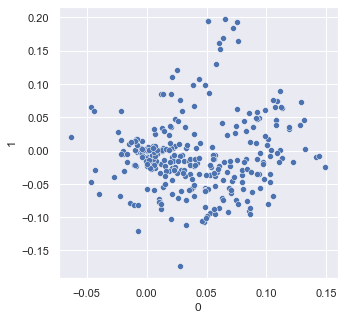

In [266]:
pca_train_df = pd.DataFrame(pca_train.components_)
sns.set(rc = {'figure.figsize':(5,5)})
sns.scatterplot(x=pca_train_df.T[0], y=pca_train_df.T[1])

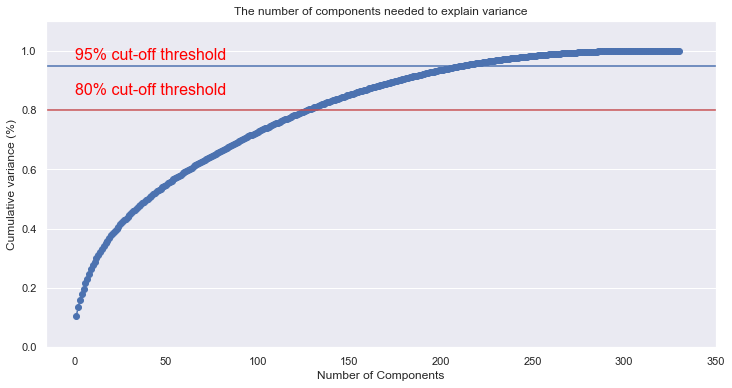

In [267]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 331, step=1)
y = np.cumsum(pca_train.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 400, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.95, color='b', linestyle='-')
plt.text(0.5, 0.97, '95% cut-off threshold', color = 'red', fontsize=16)


ax.grid(axis='x')
plt.show()

# https://www.kaggle.com/code/kushal1506/deciding-n-components-in-pca/notebook

In [268]:
pca_final = PCA(n_components = 200) # INSERT NUMBER OF COMPONENTS
X_train_pca = pca_final.fit_transform(X_train_scaled)

In [269]:
X_train_pca.shape

(6554, 200)

In [270]:
# pca_exp_var = pd.DataFrame(pca_final.explained_variance_ratio_,)
# pca_exp_var.T

In [271]:
## PCA on 2018 data

X_test = X_test.to_numpy(dtype=float, copy=True)
X_test_scaled = scaler_train.transform(X_test)
X_test_pca = pca_final.transform(X_test_scaled)

In [272]:
X_test_pca.shape

(6436, 200)

In [273]:
y_train_final = np.log(y_train)

In [274]:
y_train_final.describe()

,energy_consumption
count,6554.000000
mean,14.940004
std,2.366246
min,1.791759
25%,13.192421
50%,14.833817
75%,16.644452
max,21.809715


In [275]:
X_train_pca.shape

(6554, 200)

In [276]:
model = lr.fit(X_train_pca, y_train_final)
y_pred = model.predict(X_test_pca)

In [277]:
y_pred.shape

(6436, 1)

In [278]:
predicted = pd.DataFrame(y_pred).rename(columns={0:'predicted'})

In [279]:
predicted.describe()

,predicted
count,6436.000000
mean,25.186869
std,141.986651
min,-2194.823181
25%,6.967768
50%,26.716889
75%,44.909893
max,1130.145517


In [281]:
# predicted[predicted['predicted'] >= np.mean(predicted.values)]

In [282]:
predicted[predicted['predicted'] >= 500].shape

(52, 1)

In [283]:
predicted[predicted['predicted'] <= -500].shape

(52, 1)

In [197]:
X_test_pca.shape

(6436, 200)

In [198]:
df_outliers=pd.concat([df_filled,predicted],axis=1,join='inner')
df_outliers

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP,predicted
0,1,3,5,2,210000,8,1,4,0,1,...,2,2,1,2,2,2,2,1,0,55.624984
1,2,4,9,2,28000,5,1,6,1,1,...,2,1,1,1,1,1,2,1,15,8.137359
2,3,3,5,8,2100,2,1,4,0,3,...,2,4,1,2,2,2,1,2,40,22.421874
3,4,3,7,5,240000,8,2,6,1,1,...,2,2,1,2,1,2,2,2,5,1.272020
4,5,1,2,5,295000,8,3,6,0,1,...,2,4,1,2,1,2,2,1,0,19.773667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6431,6432,4,8,14,130000,7,1,1,0,1,...,2,3,1,2,2,2,2,1,15,-4.387957
6432,6433,3,7,1,1050,2,1,5,0,2,...,0,0,0,2,1,2,1,2,10,13.392063
6433,6434,3,5,2,122000,7,2,6,1,1,...,2,3,1,2,1,2,2,2,0,96.549256
6434,6435,3,5,23,15000,4,3,5,1,2,...,2,2,1,3,1,1,1,2,5,15.752436


In [199]:
df_outliers.to_csv('df_outliers.csv')

In [200]:
predicted.describe()

,predicted
count,6436.000000
mean,-30.342642
std,935.622889
min,-21423.660322
25%,0.682785
50%,16.399537
75%,34.150166
max,946.824391


<AxesSubplot:ylabel='Count'>

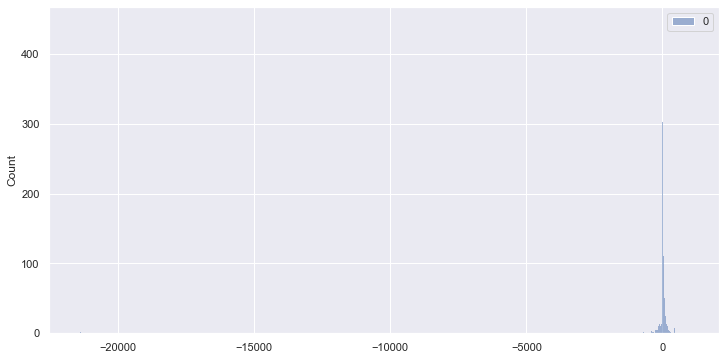

In [201]:
sns.histplot(data=y_pred)

In [202]:
y_train_final.reset_index(inplace=True, drop=True)

In [203]:
testing = model.predict(X_train_pca)

In [204]:
testing = pd.DataFrame(testing)

In [205]:
testing

,0
0,11.577734
1,16.392302
2,11.765639
3,18.986529
4,16.507539
...,...
6549,16.849890
6550,11.386645
6551,12.863676
6552,14.364543


In [206]:
y_train_final.shape

(6554, 1)

In [207]:
df1=pd.concat([y_train_final,testing],axis=1,join='inner').rename(columns={'energy_consumption': 'original', 0:'predicted'})
df1

,original,predicted
0,10.894292,11.577734
1,16.281858,16.392302
2,11.261717,11.765639
3,18.388926,18.986529
4,15.159338,16.507539
...,...,...
6549,16.526452,16.849890
6550,8.839277,11.386645
6551,13.775151,12.863676
6552,14.833772,14.364543


In [208]:
df1['residual']= df1['original'] - df1['predicted']
df1

,original,predicted,residual
0,10.894292,11.577734,-0.683443
1,16.281858,16.392302,-0.110444
2,11.261717,11.765639,-0.503922
3,18.388926,18.986529,-0.597603
4,15.159338,16.507539,-1.348201
...,...,...,...
6549,16.526452,16.849890,-0.323438
6550,8.839277,11.386645,-2.547368
6551,13.775151,12.863676,0.911475
6552,14.833772,14.364543,0.469229


<AxesSubplot:xlabel='predicted', ylabel='residual'>

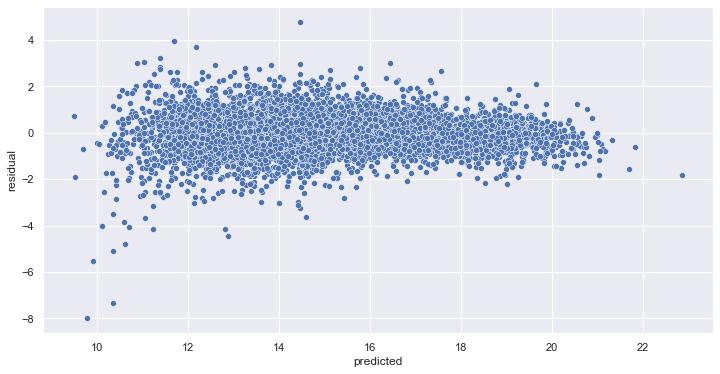

In [209]:
sns.scatterplot(data=df1, x="predicted", y="residual")

In [210]:
lr.score(X_train_pca, y_train_final)

0.8811855760924379